# MNIST database of handwritten digits. 2nd version of a Keras Neural Network (2 hidden layers with Dropout, 20 iterations). RMSprop optimizer instead of SGD.

## http://yann.lecun.com/exdb/mnist/

In [1]:
# https://keras.io/
!pip install -q keras
import keras

Using TensorFlow backend.


In [0]:
import numpy as np
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers.core import Dense, Dropout, Activation
from keras.optimizers import RMSprop
from keras.utils import np_utils

import matplotlib.pyplot as plt

In [0]:
# for reproducibility
np.random.seed(123)

In [0]:
# network and training
NB_EPOCH = 20
BATCH_SIZE = 128
VERBOSE = 1
NB_CLASSES = 10 # number of outputs = number of digits
OPTIMIZER = RMSprop() # RMSprop optimizer
N_HIDDEN = 128 # number of neurons in each hidden layer
VALIDATION_SPLIT = 0.2 # how much train is reserved fro validation
DROPOUT = 0.3 # Way to prevent overfitting, way of regularization

In [5]:
# data shuffled and split between train and test sets
(X_train, y_train), (X_test, y_test) = mnist.load_data()

11493376/11490434 [==============================] - 1s 0us/step


In [6]:
X_train.shape # X_train is 60000 rows of 28x28 values 

(60000, 28, 28)

In [0]:
# X_train to be reshaped in 60000x784
RESHAPED = 784 # number of neurons

X_train = X_train.reshape(60000, RESHAPED)
X_test = X_test.reshape(10000, RESHAPED)
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

In [8]:
# normalize 
X_train /= 255
X_test /= 255

print(X_train.shape[0], 'training set')
print(X_test.shape[0], 'testing set')

60000 training set
10000 testing set


In [0]:
# convert class vectors to binary class matrices
Y_train = np_utils.to_categorical(y_train, NB_CLASSES)
Y_test = np_utils.to_categorical(y_test, NB_CLASSES)

In [0]:
# Define the Sequential model or linear stack of layers
model = Sequential()

# 1st hidden layer
model.add(Dense(N_HIDDEN, input_shape=(RESHAPED,)))
model.add(Activation('relu'))
model.add(Dropout(DROPOUT))

# 2nd hidden layer
model.add(Dense(N_HIDDEN))
model.add(Activation('relu'))
model.add(Dropout(DROPOUT))

# Output layer with 10 neurons
model.add(Dense(NB_CLASSES))
model.add(Activation('softmax'))

In [11]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 128)               100480    
_________________________________________________________________
activation_1 (Activation)    (None, 128)               0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 128)               16512     
_________________________________________________________________
activation_2 (Activation)    (None, 128)               0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 10)                1290      
__________

In [0]:
model.compile(loss='categorical_crossentropy', 
              optimizer=OPTIMIZER, 
              metrics=['accuracy'])

In [13]:
history = model.fit(X_train, Y_train, batch_size=BATCH_SIZE, epochs=NB_EPOCH, verbose=VERBOSE, validation_split=VALIDATION_SPLIT)

Train on 48000 samples, validate on 12000 samples
Epoch 1/20
48000/48000 [==============================] - 3s 61us/step - loss: 0.4924 - acc: 0.8514 - val_loss: 0.1939 - val_acc: 0.9428
Epoch 2/20
48000/48000 [==============================] - 2s 45us/step - loss: 0.2311 - acc: 0.9311 - val_loss: 0.1376 - val_acc: 0.9607
Epoch 3/20
48000/48000 [==============================] - 2s 45us/step - loss: 0.1759 - acc: 0.9477 - val_loss: 0.1145 - val_acc: 0.9668
Epoch 4/20
48000/48000 [==============================] - 2s 45us/step - loss: 0.1471 - acc: 0.9561 - val_loss: 0.1056 - val_acc: 0.9710
Epoch 5/20
48000/48000 [==============================] - 2s 44us/step - loss: 0.1304 - acc: 0.9617 - val_loss: 0.1029 - val_acc: 0.9718
Epoch 6/20
28928/48000 [=================>............] - ETA: 0s - loss: 0.1238 - acc: 0.9623

48000/48000 [==============================] - 2s 44us/step - loss: 0.1217 - acc: 0.9633 - val_loss: 0.1002 - val_acc: 0.9733
Epoch 7/20
48000/48000 [==============================] - 2s 44us/step - loss: 0.1100 - acc: 0.9675 - val_loss: 0.0997 - val_acc: 0.9729
Epoch 8/20
48000/48000 [==============================] - 2s 44us/step - loss: 0.1039 - acc: 0.9694 - val_loss: 0.0947 - val_acc: 0.9757
Epoch 9/20
48000/48000 [==============================] - 2s 44us/step - loss: 0.0966 - acc: 0.9714 - val_loss: 0.0926 - val_acc: 0.9766
Epoch 10/20
48000/48000 [==============================] - 2s 44us/step - loss: 0.0926 - acc: 0.9733 - val_loss: 0.0959 - val_acc: 0.9770
Epoch 11/20
48000/48000 [==============================] - 2s 45us/step - loss: 0.0867 - acc: 0.9746 - val_loss: 0.0956 - val_acc: 0.9762
Epoch 12/20
 1408/48000 [..............................] - ETA: 2s - loss: 0.0559 - acc: 0.9794

48000/48000 [==============================] - 2s 44us/step - loss: 0.0838 - acc: 0.9750 - val_loss: 0.0935 - val_acc: 0.9756
Epoch 13/20
48000/48000 [==============================] - 2s 44us/step - loss: 0.0807 - acc: 0.9761 - val_loss: 0.0992 - val_acc: 0.9764
Epoch 14/20
48000/48000 [==============================] - 2s 45us/step - loss: 0.0786 - acc: 0.9762 - val_loss: 0.0970 - val_acc: 0.9784
Epoch 15/20
48000/48000 [==============================] - 2s 44us/step - loss: 0.0765 - acc: 0.9780 - val_loss: 0.0959 - val_acc: 0.9778
Epoch 16/20
48000/48000 [==============================] - 2s 45us/step - loss: 0.0763 - acc: 0.9776 - val_loss: 0.1016 - val_acc: 0.9777
Epoch 17/20
47744/48000 [============================>.] - ETA: 0s - loss: 0.0747 - acc: 0.9782

48000/48000 [==============================] - 2s 45us/step - loss: 0.0746 - acc: 0.9782 - val_loss: 0.1044 - val_acc: 0.9761
Epoch 18/20
48000/48000 [==============================] - 2s 45us/step - loss: 0.0708 - acc: 0.9794 - val_loss: 0.0947 - val_acc: 0.9789
Epoch 19/20
48000/48000 [==============================] - 2s 44us/step - loss: 0.0668 - acc: 0.9809 - val_loss: 0.0994 - val_acc: 0.9790
Epoch 20/20
48000/48000 [==============================] - 2s 44us/step - loss: 0.0671 - acc: 0.9803 - val_loss: 0.1025 - val_acc: 0.9777


In [14]:
score = model.evaluate(X_test, Y_test, verbose=VERBOSE)

print("Test score: ", score[0])
print("Test accuracy: ", score[1])

10000/10000 [==============================] - 1s 66us/step
Test score:  0.09537418492118122
Test accuracy:  0.9794


In [15]:
# list all data in history
print(history.history.keys())

dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])


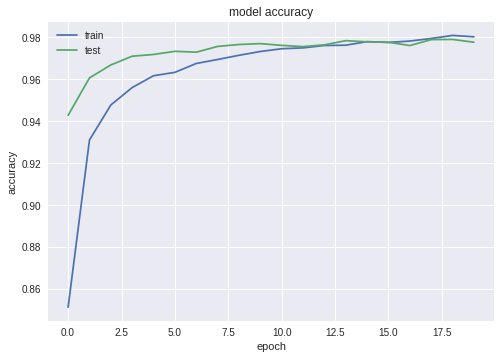

In [16]:
# summarize history for accuracy
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

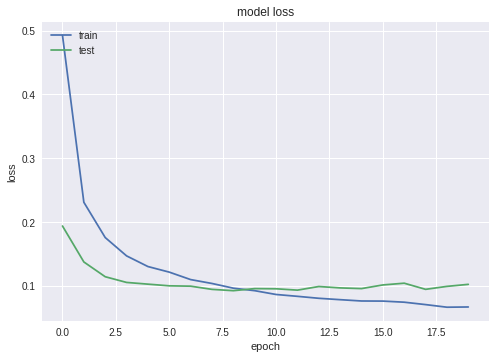

In [17]:
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()